In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
from matplotlib import rcParams

rcParams['figure.figsize'] = 18, 6


In [47]:
df = pd.read_csv("data/bbas3_info.csv")
df.head()

,Date,BBAS3,SELIC,Cambio,IPCA
0,2017-01-02,8.264061,0.1375,3.2723,0.05354
1,2017-01-03,8.642155,0.1375,3.2626,0.05354
2,2017-01-04,8.597146,0.1375,3.2327,0.05354
3,2017-01-05,8.576143,0.1375,3.2123,0.05354
4,2017-01-06,8.669160,0.1375,3.2051,0.05354


In [48]:
df["Date"] = pd.to_datetime(df["Date"])

In [49]:
df.index = df["Date"]

In [50]:
df.shape

(1986, 5)

In [51]:
df["BBAS3 Ontem"] = df['BBAS3'].shift(1)

In [52]:
df.head()

,Date,BBAS3,SELIC,Cambio,IPCA,BBAS3 Ontem
Date,,,,,,
2017-01-02,2017-01-02,8.264061,0.1375,3.2723,0.05354,NaN
2017-01-03,2017-01-03,8.642155,0.1375,3.2626,0.05354,8.264061
2017-01-04,2017-01-04,8.597146,0.1375,3.2327,0.05354,8.642155
2017-01-05,2017-01-05,8.576143,0.1375,3.2123,0.05354,8.597146
2017-01-06,2017-01-06,8.669160,0.1375,3.2051,0.05354,8.576143


In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(1985, 6)

In [55]:
y = df["BBAS3"]
X = df[["SELIC", "Cambio", "IPCA", "BBAS3 Ontem"]]

In [56]:
y_train, y_test = y[:1786], y[1786:]
X_train, X_test = X[:1786], X[1786:]

In [57]:
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

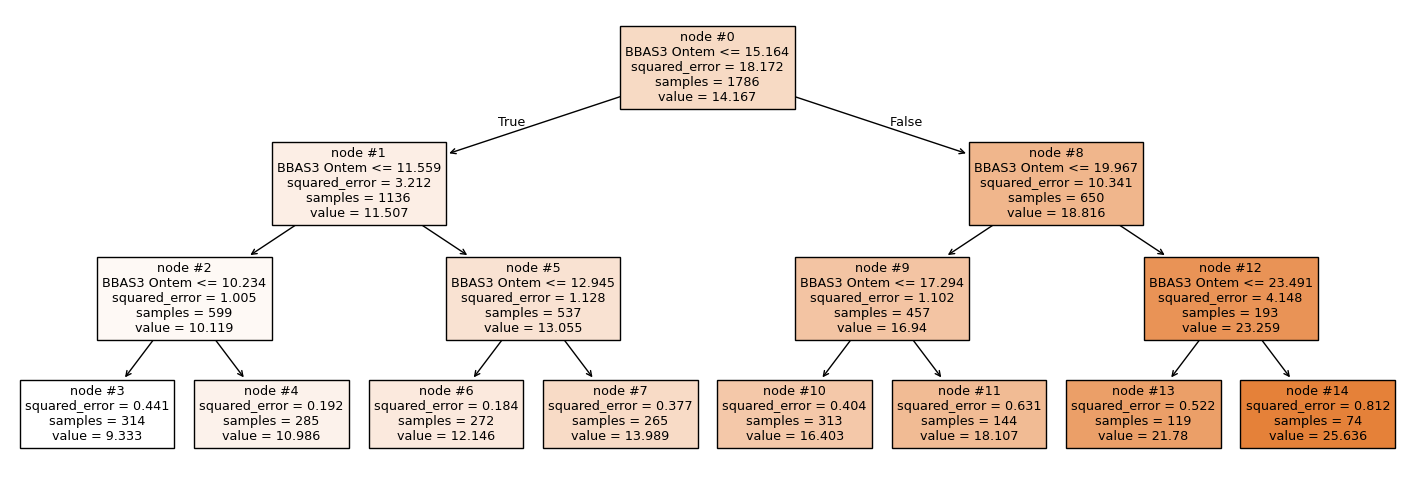

In [58]:
plot_tree(tree_reg,
          feature_names=X.columns,
          filled=True,
          node_ids=True)
plt.show()

In [59]:
tree_features = pd.DataFrame({'features': X.columns,
                              'importance': tree_reg.feature_importances_
})

In [60]:
tree_features

,features,importance
0,SELIC,0.0
1,Cambio,0.0
2,IPCA,0.0
3,BBAS3 Ontem,1.0


In [61]:
tree_pred_train = tree_reg.predict(X_train)
tree_pred_test = tree_reg.predict(X_test)

In [62]:
rmse_train = root_mean_squared_error(y_train, tree_pred_train)
mape_train = mean_absolute_percentage_error(y_train, tree_pred_train)
r2_train = r2_score(y_train, tree_pred_train)

print(f'RMSE Train: {rmse_train}\nMAPE Train: {mape_train}\nR² Train: {r2_train}')

RMSE Train: 0.6184361068426519
MAPE Train: 0.03676653684790747
R² Train: 0.9789531613214604


In [63]:
rmse_test = root_mean_squared_error(y_test, tree_pred_test)
mape_test = mean_absolute_percentage_error(y_test, tree_pred_test)
r2_test = r2_score(y_test, tree_pred_test)

print(f'RMSE Test: {rmse_test}\nMAPE Test: {mape_test}\nR² Test: {r2_test}')

RMSE Test: 0.9085707978589134
MAPE Test: 0.02764272719505843
R² Test: -0.010348286490277303


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [65]:
params = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 6, 9, 12, 15]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid=params, cv=5)

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'n_estimators': [50, 100, 200, 300]})

In [67]:
best_model = grid_search.best_estimator_

In [68]:
rf = RandomForestRegressor(max_depth=12, criterion="absolute_error")
rf.fit(X_test, y_test)

RandomForestRegressor(criterion='absolute_error', max_depth=12)

In [69]:
tree_pred_train = best_model.predict(X_train)
tree_pred_test = best_model.predict(X_test)

In [70]:
rmse_train = root_mean_squared_error(y_train, tree_pred_train)
mape_train = mean_absolute_percentage_error(y_train, tree_pred_train)
r2_train = r2_score(y_train, tree_pred_train)

print(f'RMSE Train: {rmse_train}\nMAPE Train: {mape_train}\nR² Train: {r2_train}')

RMSE Train: 0.2661892357678089
MAPE Train: 0.014678447740478346
R² Train: 0.9961007760812279


In [71]:
rmse_test = root_mean_squared_error(y_test, tree_pred_test)
mape_test = mean_absolute_percentage_error(y_test, tree_pred_test)
r2_test = r2_score(y_test, tree_pred_test)

print(f'RMSE Test: {rmse_test}\nMAPE Test: {mape_test}\nR² Test: {r2_test}')

RMSE Test: 0.42577533905941867
MAPE Test: 0.012561779692271841
R² Test: 0.7781218337780949


In [72]:
tree_features = pd.DataFrame({'features': X.columns,
                              'importance': best_model.feature_importances_
})

In [73]:
tree_features

,features,importance
0,SELIC,0.000360
1,Cambio,0.000370
2,IPCA,0.000198
3,BBAS3 Ontem,0.999072


In [74]:
y_test

Date
2024-03-18    25.762581
2024-03-19    25.670624
2024-03-20    25.946501
2024-03-21    25.583258
2024-03-22    25.477503
                ...    
2024-12-20    23.829037
2024-12-23    23.670704
2024-12-26    23.947786
2024-12-27    23.858725
2024-12-30    23.918098
Name: BBAS3, Length: 199, dtype: float64

In [75]:
tree_pred_test = pd.Series(tree_pred_test)

In [76]:
tree_pred_test.index = y_test.index

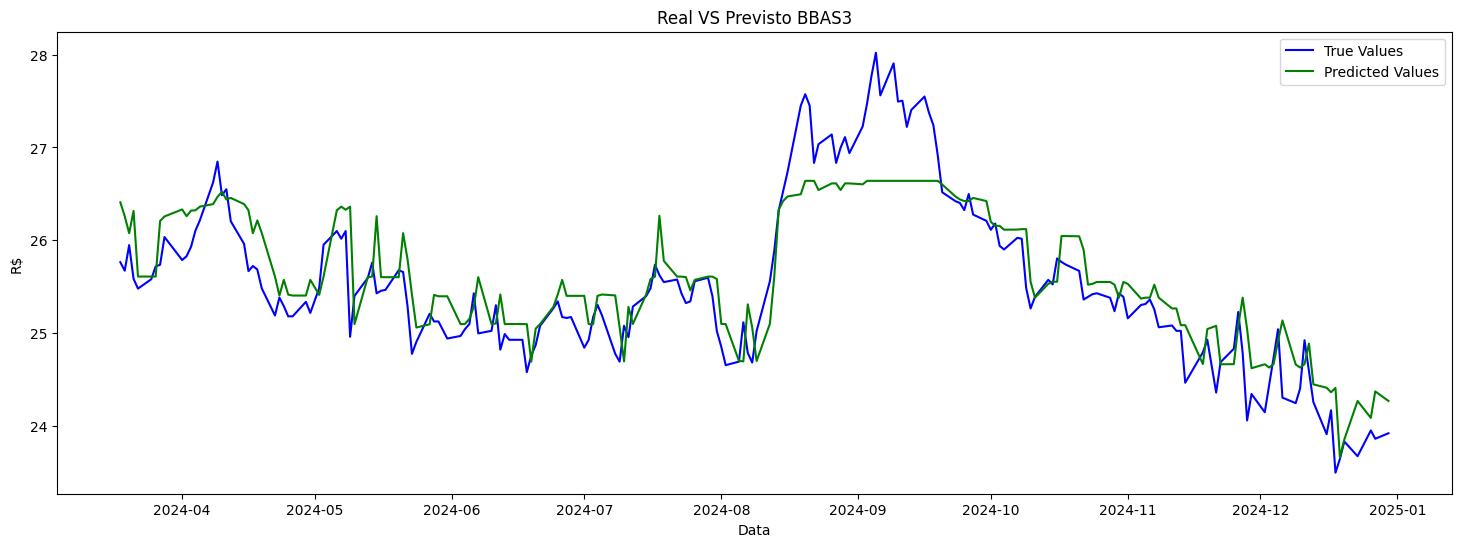

In [79]:
plt.plot(y_test, "blue", label="True Values")
plt.plot(tree_pred_test, "green", label="Predicted Values")
plt.legend()
plt.title("Real VS Previsto BBAS3")
plt.ylabel("R$")
plt.xlabel("Data")
plt.show()